In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import requests
from keras.layers import *
from keras.models import *
from keras.models import Sequential
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [3]:
# cafe
url = 'https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400'

In [4]:
ret = requests.get(url)

In [5]:
ret

<Response [200]>

In [ ]:
ret.json()

In [83]:
!pip install -U finance-datareader

In [84]:
import FinanceDataReader as fdr

In [127]:
df = fdr.DataReader('005930', '2010-01-04','2020-12-15')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,16060,16180,16000,16180,239271,0.012516
2010-01-05,16520,16580,16300,16440,559219,0.016069
2010-01-06,16580,16820,16520,16820,459755,0.023114
2010-01-07,16820,16820,16260,16260,443237,-0.033294
2010-01-08,16400,16420,16120,16420,295798,0.009840


In [104]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-12-09,72100,73900,72000,73900,24077996,0.030683
2020-12-10,72700,73800,72500,72900,39882928,-0.013532
2020-12-11,73500,73800,73100,73400,18486672,0.006859
2020-12-14,73600,74500,73200,73800,21510415,0.005450
2020-12-15,73800,74100,73300,73800,20863671,0.000000


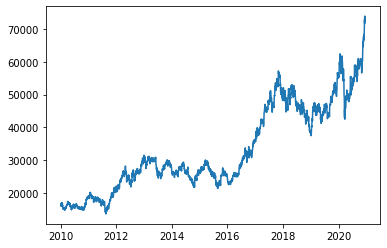

In [105]:
plt.plot(df.Close)

In [88]:
# df = pd.DataFrame(ret.json())
# df.head()

In [90]:
df.Close[-10:]

Date
2020-12-03    69700
2020-12-04    71500
2020-12-07    72900
2020-12-08    71700
2020-12-09    73900
2020-12-10    72900
2020-12-11    73400
2020-12-14    73800
2020-12-15    73800
2020-12-16    73800
Name: Close, dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2704 entries, 2010-01-04 to 2020-12-15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2704 non-null   int64  
 1   High    2704 non-null   int64  
 2   Low     2704 non-null   int64  
 3   Close   2704 non-null   int64  
 4   Volume  2704 non-null   int64  
 5   Change  2704 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 147.9 KB


In [131]:
scaler = MinMaxScaler()
price = scaler.fit_transform(df['Close'].values.reshape(-1,1))
price = price.tolist()
price[:10]

[[0.04278606965174128],
 [0.04709784411276949],
 [0.05339966832504148],
 [0.04411276948590384],
 [0.04676616915422885],
 [0.038805970149253716],
 [0.04278606965174128],
 [0.038805970149253716],
 [0.04875621890547263],
 [0.05373134328358212]]

In [ ]:
# 5일 간의 주가흐름을 기반으로 다음 날의 주가를 예측하는 모델..

In [129]:
# price = df['Close'].values.tolist()
# price[:10]

[16180, 16440, 16820, 16260, 16420, 15940, 16180, 15940, 16540, 16840]

In [132]:
# sequence_length = 5
print(price[:30])

[[0.04278606965174128], [0.04709784411276949], [0.05339966832504148], [0.04411276948590384], [0.04676616915422885], [0.038805970149253716], [0.04278606965174128], [0.038805970149253716], [0.04875621890547263], [0.05373134328358212], [0.0540630182421227], [0.04742951907131013], [0.051077943615257054], [0.056384742951907124], [0.04809286898839141], [0.05373134328358212], [0.044776119402985065], [0.039800995024875635], [0.0424543946932007], [0.034494195688225565], [0.03217247097844114], [0.030514096185738], [0.03217247097844114], [0.0318407960199005], [0.023217247097844118], [0.022553897180762866], [0.026865671641791072], [0.02487562189054729], [0.027529021558872296], [0.023217247097844118]]


In [133]:
window_size = 5
x = []
y = []

for i in range(len(price)-window_size):
  x.append([price[i+j] for j in range(window_size)])
  y.append(price[window_size + i])

In [134]:
x[:5]

[[[0.04278606965174128],
  [0.04709784411276949],
  [0.05339966832504148],
  [0.04411276948590384],
  [0.04676616915422885]],
 [[0.04709784411276949],
  [0.05339966832504148],
  [0.04411276948590384],
  [0.04676616915422885],
  [0.038805970149253716]],
 [[0.05339966832504148],
  [0.04411276948590384],
  [0.04676616915422885],
  [0.038805970149253716],
  [0.04278606965174128]],
 [[0.04411276948590384],
  [0.04676616915422885],
  [0.038805970149253716],
  [0.04278606965174128],
  [0.038805970149253716]],
 [[0.04676616915422885],
  [0.038805970149253716],
  [0.04278606965174128],
  [0.038805970149253716],
  [0.04875621890547263]]]

In [135]:
y[:5]

[[0.038805970149253716],
 [0.04278606965174128],
 [0.038805970149253716],
 [0.04875621890547263],
 [0.05373134328358212]]

In [136]:
x = np.array(x)
y = np.array(y)

In [114]:
x.shape

(2699, 5)

In [116]:
y.shape

(2699,)

In [137]:
train_test_split = 1500
x_train = x[:1500, :]
x_test = x[1500:]

y_train = y[:1500]
y_test = y[1500:]

In [138]:
# (n_sample, sequence_len, n_features)

x_train = np.reshape(x_train, (x_train.shape[0], window_size, 1))
x_train[:2]

array([[[0.04278607],
        [0.04709784],
        [0.05339967],
        [0.04411277],
        [0.04676617]],

       [[0.04709784],
        [0.05339967],
        [0.04411277],
        [0.04676617],
        [0.03880597]]])

In [139]:
x_test = np.reshape(x_test, (x_test.shape[0], window_size, 1))
x_test.shape

(1199, 5, 1)

In [30]:
x_train.shape

(1500, 5, 1)

In [140]:
model = Sequential()
model.add(LSTM(128, input_shape=(5,1,), activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(74))
model.add(Dense(30,activation='linear'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 5, 128)            66560     
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 128)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 74)                60088     
_________________________________________________________________
dense_10 (Dense)             (None, 30)                2250      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 128,929
Trainable params: 128,929
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(loss='mse', 
              optimizer='adam')

In [142]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=1, validation_split=0.2)

Epoch 1/20
1200/1200 [==============================] - 6s 5ms/step - loss: 5.0329e-04 - val_loss: 3.0806e-04
Epoch 2/20
1200/1200 [==============================] - 5s 4ms/step - loss: 2.4773e-04 - val_loss: 1.0598e-04
Epoch 3/20
1200/1200 [==============================] - 5s 4ms/step - loss: 2.1464e-04 - val_loss: 1.0986e-04
Epoch 4/20
1200/1200 [==============================] - 5s 4ms/step - loss: 2.0867e-04 - val_loss: 8.7602e-05
Epoch 5/20
1200/1200 [==============================] - 5s 4ms/step - loss: 2.0490e-04 - val_loss: 1.4683e-04
Epoch 6/20
1200/1200 [==============================] - 5s 4ms/step - loss: 1.7312e-04 - val_loss: 6.7084e-04
Epoch 7/20
1200/1200 [==============================] - 5s 4ms/step - loss: 1.5483e-04 - val_loss: 6.7642e-05
Epoch 8/20
1200/1200 [==============================] - 5s 4ms/step - loss: 1.6908e-04 - val_loss: 7.4010e-05
Epoch 9/20
1200/1200 [==============================] - 5s 4ms/step - loss: 1.3492e-04 - val_loss: 8.0844e-05
Epoch 10/2

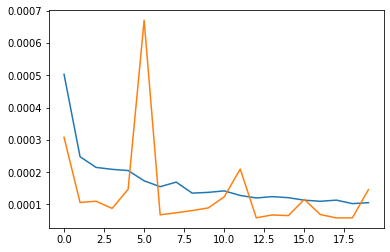

In [143]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])


In [ ]:
x_test

In [144]:
model.predict(x_train)

array([[0.05534786],
       [0.05026444],
       [0.05181552],
       ...,
       [0.16843766],
       [0.16811931],
       [0.16270855]], dtype=float32)

In [145]:
model.predict(x_test)

array([[0.1710355 ],
       [0.16522248],
       [0.16586846],
       ...,
       [0.7753832 ],
       [0.7793351 ],
       [0.7824756 ]], dtype=float32)

In [ ]:
plt.plot(model.predict(x_train))

In [ ]:
plt.plot(y_train)

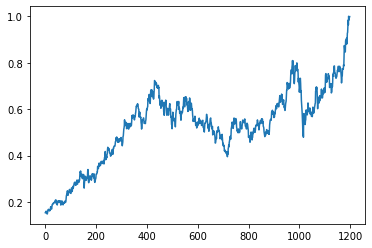

In [153]:
plt.plot(y_test)

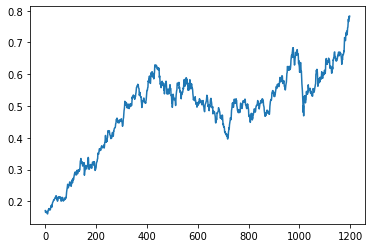

In [154]:
plt.plot(model.predict(x_test))

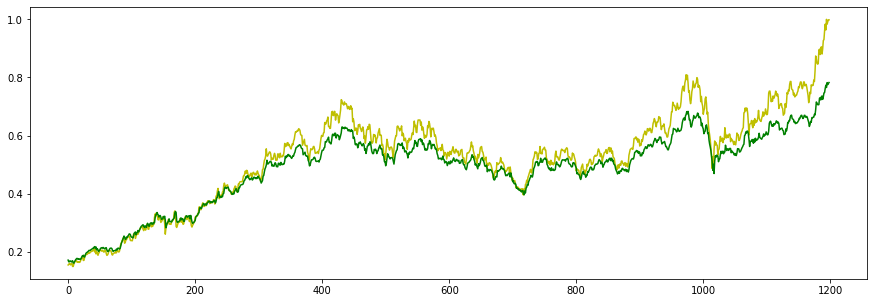

In [160]:
plt.figure(figsize=(15,5))
plt.plot(y_test, color='y')
plt.plot(model.predict(x_test), color='g')